# Day 09. Exercise 02
# Metrics

## 0. Imports

In [1]:
import pandas as pd
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tqdm import tqdm
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
import joblib

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [2]:
df = pd.read_csv("../data/dayofweek-not-scaled.csv")
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('dayofweek', axis=1), df['dayofweek'], test_size=0.2, random_state=21, stratify=df['dayofweek'])

## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [4]:
def calculate_metrics(model, ret=False):
    acc = accuracy_score(y_test, model.predict(X_test))
    pres, recall, _, _ = precision_recall_fscore_support(y_test, model.predict(X_test), average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo', average='weighted')
    if ret is False:
        print('accuracy is ' + format(round(acc, 5), '0.5f'))
        print('precision is ' + format(round(pres, 5), '0.5f'))
        print('recall is ' + format(round(recall, 5), '0.5f'))
        print('roc_auc is ' + format(round(roc_auc, 5), '0.5f'))
    if ret:
        return acc, pres, recall, roc_auc
    

In [5]:
my_svm = svm.SVC(random_state = 21, probability=True, kernel='rbf', class_weight=None, gamma='auto', C=10)
my_svm.fit(X_train, y_train)
calculate_metrics(my_svm)

accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878


## 3. Decision tree

1. The same task for decision tree

In [6]:
dtc_model = DecisionTreeClassifier(random_state = 21, max_depth=22, criterion='gini', class_weight='balanced')
dtc_model.fit(X_train, y_train)
calculate_metrics(dtc_model)

accuracy is 0.89053
precision is 0.89262
recall is 0.89053
roc_auc is 0.93664


## 4. Random forest

1. The same task for random forest.

In [7]:
rf = RandomForestClassifier(random_state = 21, n_estimators=50, criterion='gini', max_depth=28, class_weight=None)
rf.fit(X_train, y_train)
calculate_metrics(rf)

accuracy is 0.92899
precision is 0.93009
recall is 0.92899
roc_auc is 0.99033


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

In [8]:
rf = RandomForestClassifier(random_state = 21, n_estimators=50, criterion='gini', max_depth=28, class_weight=None)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

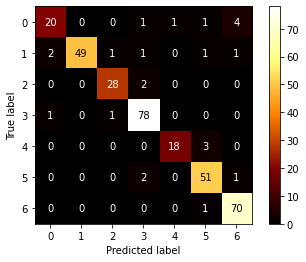

In [9]:
cm = confusion_matrix(y_test, predict, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='afmhot')

ll = plt.show()

In [10]:

index = pd.DataFrame((y_test - predict).fillna(0).astype('bool')).query('dayofweek==True')
index = index.join(X_test).drop(['numTrials', 'hour', 'dayofweek'], axis=1)
index.sum(numeric_only=True, axis=0).sort_values(ascending=False).head()


labname_project1    9.0
labname_laba04      6.0
uid_user_19         4.0
labname_laba06s     2.0
labname_laba06      2.0
dtype: float64

In [11]:
file_name = '../data/model_rf.sav'
joblib.dump(rf, file_name)

['../data/model_rf.sav']

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [12]:
def metrics_ret(models, parametres):
    metrics = {}
    for mod, params in zip(models, parametres):
        mod_ = mod.set_params(**params)
        mod_.fit(X_train, y_train)
        ret = calculate_metrics(mod_, ret=True)
        metrics[mod] = {'accuracy': ret[0], 'precision': ret[1], 'recall': ret[2], 'roc_auc': ret[3]}
    return metrics

In [13]:
models = [DecisionTreeClassifier(), svm.SVC()]
params = [{'random_state': 21
          , 'max_depth': 22
          , 'criterion': 'gini'
          , 'class_weight': 'balanced' } ,
          {'random_state': 21
          , 'probability': True
          , 'class_weight': None
          , 'kernel': 'rbf'
          , 'gamma': 'auto'
          , 'C': 10}]

In [14]:
metrics_ret(models, params)

{DecisionTreeClassifier(class_weight='balanced', max_depth=22, random_state=21): {'accuracy': 0.8905325443786982,
  'precision': 0.8926192681313897,
  'recall': 0.8905325443786982,
  'roc_auc': 0.9366351447213223},
 SVC(C=10, gamma='auto', probability=True, random_state=21): {'accuracy': 0.8875739644970414,
  'precision': 0.8926729169690374,
  'recall': 0.8875739644970414,
  'roc_auc': 0.9787793228216216}}